# simulate primers and readout probes using NUPACK

v0.1.0 - working version

In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import Bio.SeqUtils.MeltingTemp as mt
import os
import nupack

from dredFISH.Utils.__init__plots import *
from dredFISH.Utils import nupacku

In [2]:
def parse_encoding_complex(seq, option='+'):
    # P1-R-a-E-a-R-a-R-P2
    breakpoints = np.array([0, 20, 40, 41, 71, 72, 92, 93, 113, 133])
    if option == '+': # 1R-2R
        bp = breakpoints
        
        p1 = seq[bp[0]:bp[1]]
        R1 = seq[bp[1]:bp[2]]
        s1 = seq[bp[2]:bp[3]]
        E  = seq[bp[3]:bp[4]]
        s2 = seq[bp[4]:bp[5]]
        R2 = seq[bp[5]:bp[6]]
        s3 = seq[bp[6]:bp[7]]
        R3 = seq[bp[7]:bp[8]]
        p2 = seq[bp[8]:bp[9]]
        
        return E, R1, R2, R3, p1, p2, s1, s2, s3,  
        
    if option == '-': # 2R-1R
        bp = (133 - breakpoints)[::-1]
    
        p1 = seq[bp[0]:bp[1]]
        R1 = seq[bp[1]:bp[2]]
        s1 = seq[bp[2]:bp[3]]
        R2 = seq[bp[3]:bp[4]]
        s2 = seq[bp[4]:bp[5]]
        E  = seq[bp[5]:bp[6]]
        s3 = seq[bp[6]:bp[7]]
        R3 = seq[bp[7]:bp[8]]
        p2 = seq[bp[8]:bp[9]]
        
        return E, R1, R2, R3, p1, p2, s1, s2, s3,  
    
def parse_encoding(seq):
    """
    """
    # P1-R-a-E-a-R-P2
    breakpoints = np.array([0, 20, 40, 41, 71, 72, 92, 112])
    bp = breakpoints

    p1 = seq[bp[0]:bp[1]]
    R1 = seq[bp[1]:bp[2]]
    s1 = seq[bp[2]:bp[3]]
    E  = seq[bp[3]:bp[4]]
    s2 = seq[bp[4]:bp[5]]
    R2 = seq[bp[5]:bp[6]]
    p2 = seq[bp[6]:bp[7]]

    return E, R1, R2, p1, p2, s1, s2

# get data

In [3]:
f = '/greendata/GeneralStorage/fangming/projects/dredfish/res_seq/dredFISH_PNMF_DPNMF_IEG_pFinal_Oligos_Nov2022_v6.fasta'
# f = "/bigstore/binfo/Probe_Sets/dredFISH_Final_Oligos.fasta"

In [4]:
allseqs = []

for i, record in enumerate(SeqIO.parse(f, "fasta")):
    seq = record.seq
    dsp = record.description
    
    E, R1,R2, p1,p2, s1,s2, = parse_encoding(seq)
    if (str(s1),str(s2)) == ('A', 'A'):
        pass
    else:
        print(s1,s2)
        break
        
    assert R1 == R2
    
    setname = dsp.split(' ')[0]
    name = dsp.split(' ')[2]
    allseqs.append((setname, name, str(R1)))
    
    name = dsp.split(' ')[1]
    allseqs.append((setname, name, str(p1)))
    
    name = dsp.split(' ')[-1]
    allseqs.append((setname, name, str(p2)))
    
    # if i > 100:
    #     break

In [5]:
unqseqs = np.unique(allseqs, axis=0)
unqseqs = pd.DataFrame(unqseqs, columns=['set', 'probename', 'seq'])
unqseqs

,set,probename,seq
0,IEGs_n136_Wu_etal_2017_Neuron,RS0639,AGTGTGGGATTGATGAGATA
1,IEGs_n136_Wu_etal_2017_Neuron,pf_3,CGCTTTCGAATACGCCGAGT
2,IEGs_n136_Wu_etal_2017_Neuron,pr_Hpal,CGTTAACCTGGCCCGGCTAC
3,dredFISH_DPNMFtree_Nov2022,RS0095,AGAGTGAGTAGTAGTGGAGT
4,dredFISH_DPNMFtree_Nov2022,RS0109,TGTGATGGAAGTTAGAGGGT
...,...,...,...
62,validation1_NP_CT_L6b,pf_6,CCTGCACAAATCGTTGCGGT
63,validation1_NP_CT_L6b,pr_Hpal_4,TGTTAACGGAAACGCGACGG
64,validation2_DG_SUB_CA,RS0763-Fang22,GGGTAGTGGGAATGATTTAT
65,validation2_DG_SUB_CA,pf_7,ACGATCTGCTGCGCGTACCT


In [6]:
uniqseqs_v2 = unqseqs.groupby(['probename', 'seq']).size().reset_index().sort_values('probename')
uniqseqs_v2

,probename,seq,0
0,RS0095,AGAGTGAGTAGTAGTGGAGT,2
1,RS0109,TGTGATGGAAGTTAGAGGGT,2
2,RS0175,TGAAAGGAATGGGTTGTGGT,2
3,RS0237,GGGTTGATTAGTGGTAGAAA,2
4,RS0307,TGTGGAGGGATTGAAGGATA,2
5,RS0332,GGGAGAATGAGGTGTAATGT,2
6,RS0384,TAGAGTTGATAGAGGGAGAA,2
7,RS0406,GATGATGTAGTAGTAAGGGT,2
8,RS0451,GGAGTAGTTGGTTGTTAGGA,2
9,RS0468,AGGAGGAGGGTAATGATAGA,2


# setting up NUPACK

In [7]:
seqs_enc = uniqseqs_v2['seq'].values
seqs_tag = uniqseqs_v2['probename'].values
seqs_token = np.arange(28,42)

print(seqs_enc)
print(seqs_enc.size)
print(seqs_tag)
print(seqs_tag[28:42])

['AGAGTGAGTAGTAGTGGAGT' 'TGTGATGGAAGTTAGAGGGT' 'TGAAAGGAATGGGTTGTGGT'
 'GGGTTGATTAGTGGTAGAAA' 'TGTGGAGGGATTGAAGGATA' 'GGGAGAATGAGGTGTAATGT'
 'TAGAGTTGATAGAGGGAGAA' 'GATGATGTAGTAGTAAGGGT' 'GGAGTAGTTGGTTGTTAGGA'
 'AGGAGGAGGGTAATGATAGA' 'GAGGGTTTGTAAGGTGAATA' 'AGTGTGGGATTGATGAGATA'
 'GAGATTAGAGATGAGTTGGA' 'AGTTGAGGTGGGAGAGTATT' 'GGGTAGTGGGAATGATTTAT'
 'GGTATTATGTAGGAAGGTGG' 'GAGAAGTGGTTGTAGAGTGT' 'GGTTAGTAGGTTGTGGTGTT'
 'GAAGTGAGGTGATTGAGTGA' 'GTATAAGGTGATTGGTGGTG' 'GGAGTAGGTTGATGTGTAGT'
 'GAGTGTGTGTTAAGGTAGGT' 'GAGAGAGGATTAGGTATTGG' 'GGTGGTTGATTAAGGATGGT'
 'ATGTGAGTGGTGAGAATGTG' 'GGAGGTTAGAATTTGTGAGG' 'GTAGGTGTTATGTTAGGAGG'
 'TGGTTAGAGGTTAGTGGTTG' 'CATGGCATTCTTCGCCGGCT' 'GCGTGTAGGCACGCAAGAGT'
 'CGCTTTCGAATACGCCGAGT' 'TCCTCCGACCGAAGCTGGAT' 'TGTTCCGCACGCCGTCTCTT'
 'CCTGCACAAATCGTTGCGGT' 'ACGATCTGCTGCGCGTACCT' 'TGCTAGCCAACTAACGCGCC'
 'GCGTACGAGACCCGGTACTG' 'CGTTAACCTGGCCCGGCTAC' 'CGTTAACTGTGACCGCCCGT'
 'GGTTAACTCGCGACACGTGG' 'TGTTAACGGAAACGCGACGG' 'GGTTAACAGGCGTCGGCTGA']
42
['RS0095' 'RS010

In [8]:
nupacku.get_num_combinations(len(seqs_enc)+1)

989.0

# run NUPACK simulation

In [9]:
%time

conc_r = 1e-6 # ~ 1 uM
conc_e = 1/100*conc_r # changes as we go (exponential growth)
sodium = 1 # 0.3  # 300 mM
temps = [35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

resall, emaps, raw_concs, tms = nupacku.simulate_cross_binding(
                           seqs_enc, 
                           seqs_tag=seqs_tag, 
                           seqs_token=seqs_token, 
                           conc_r=conc_r,
                           conc_e=conc_e, 
                           temps=temps,
                           sodium=sodium,
                           material='dna',
                           adaptive=False,
                         )


CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 13.6 µs
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............
>..............


In [10]:
resall

,readout_idx,readout_tag,tm,t,precision,usage,recall
0,28,pf_1,79.704430,35,0.217031,0.010000,1.000000
1,29,pf_2,78.976928,35,0.926768,0.010000,1.000000
2,30,pf_3,76.470762,35,0.498171,0.010000,1.000000
3,31,pf_4,79.179557,35,0.824130,0.010000,1.000000
4,32,pf_5,80.648427,35,0.071012,0.010000,1.000000
...,...,...,...,...,...,...,...
191,37,pr_Hpal,78.980195,100,0.651349,0.000244,0.024388
192,38,pr_Hpal_2,78.691092,100,0.180037,0.000032,0.003205
193,39,pr_Hpal_3,76.900319,100,0.099307,0.000019,0.001911
194,40,pr_Hpal_4,76.879009,100,0.106944,0.000021,0.002074


# 3 types of visuals
- raw concentration (log scale wrt reference)
- cross binding heatmap
- precision vs recall

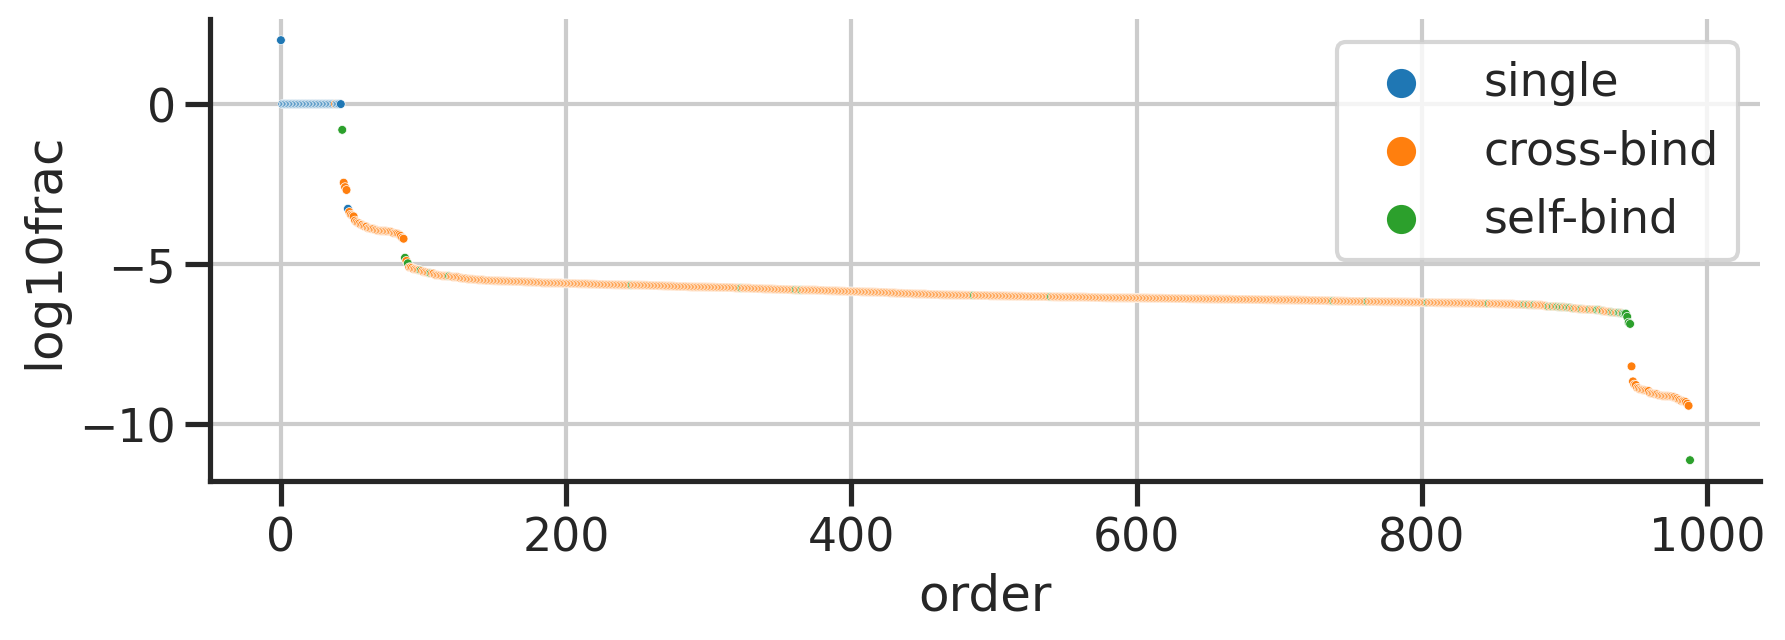

In [11]:
res = raw_concs[70][28]
nupacku.view_raw(res)

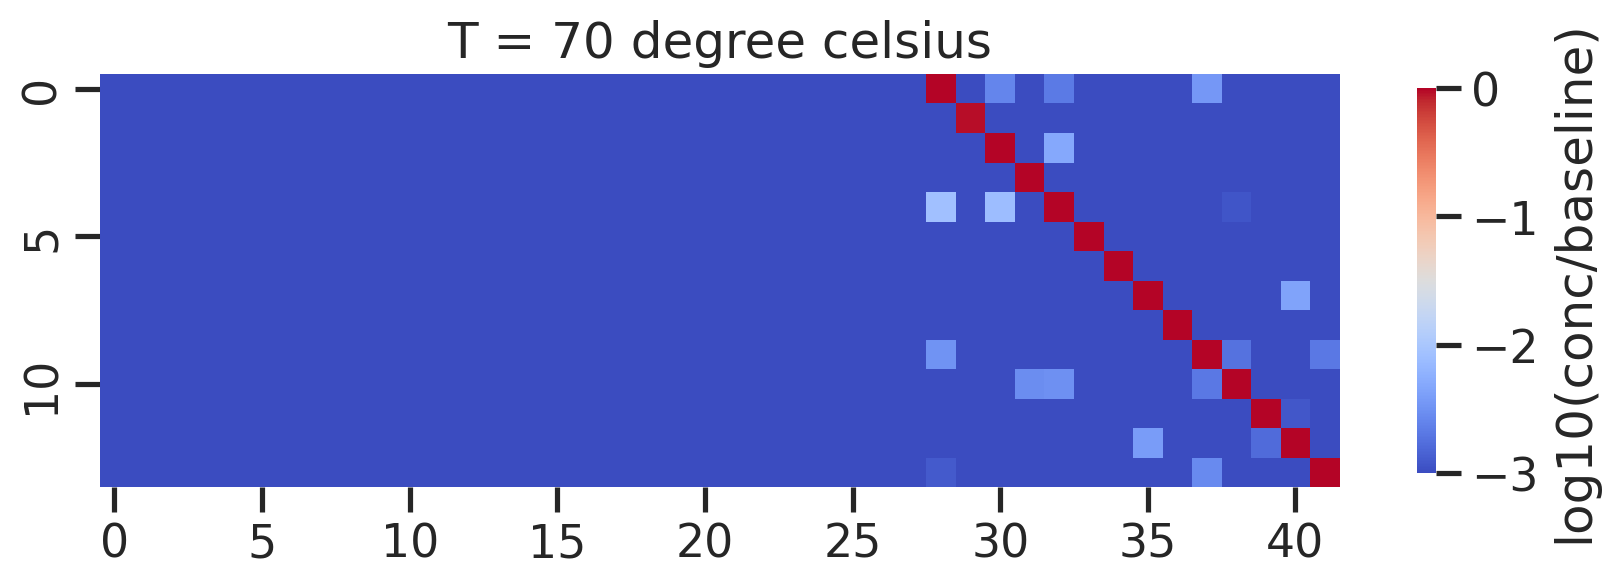

In [12]:
baseconc = conc_e
temp = 70
emap = emaps[temp]
title = f"T = {temp} degree celsius"
fig, ax = plt.subplots(figsize=(10,5))
nupacku.view_emap(emap, baseconc, ax=ax, title=title, vmax=0, vmin=-3)

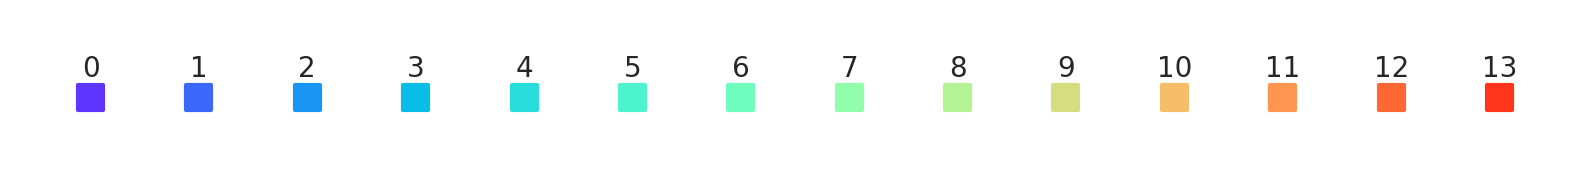

In [13]:
ntests = len(seqs_token)
colors = sns.color_palette('rainbow', ntests) 

fig, ax = plt.subplots(figsize=(10,1))
ax.scatter(np.arange(len(colors)), [0]*len(colors), c=colors, marker='s')
for i in range(len(colors)):
    ax.text(i, 0.01, i, fontsize=10, ha='center', va='bottom')
ax.axis('off')
plt.show()

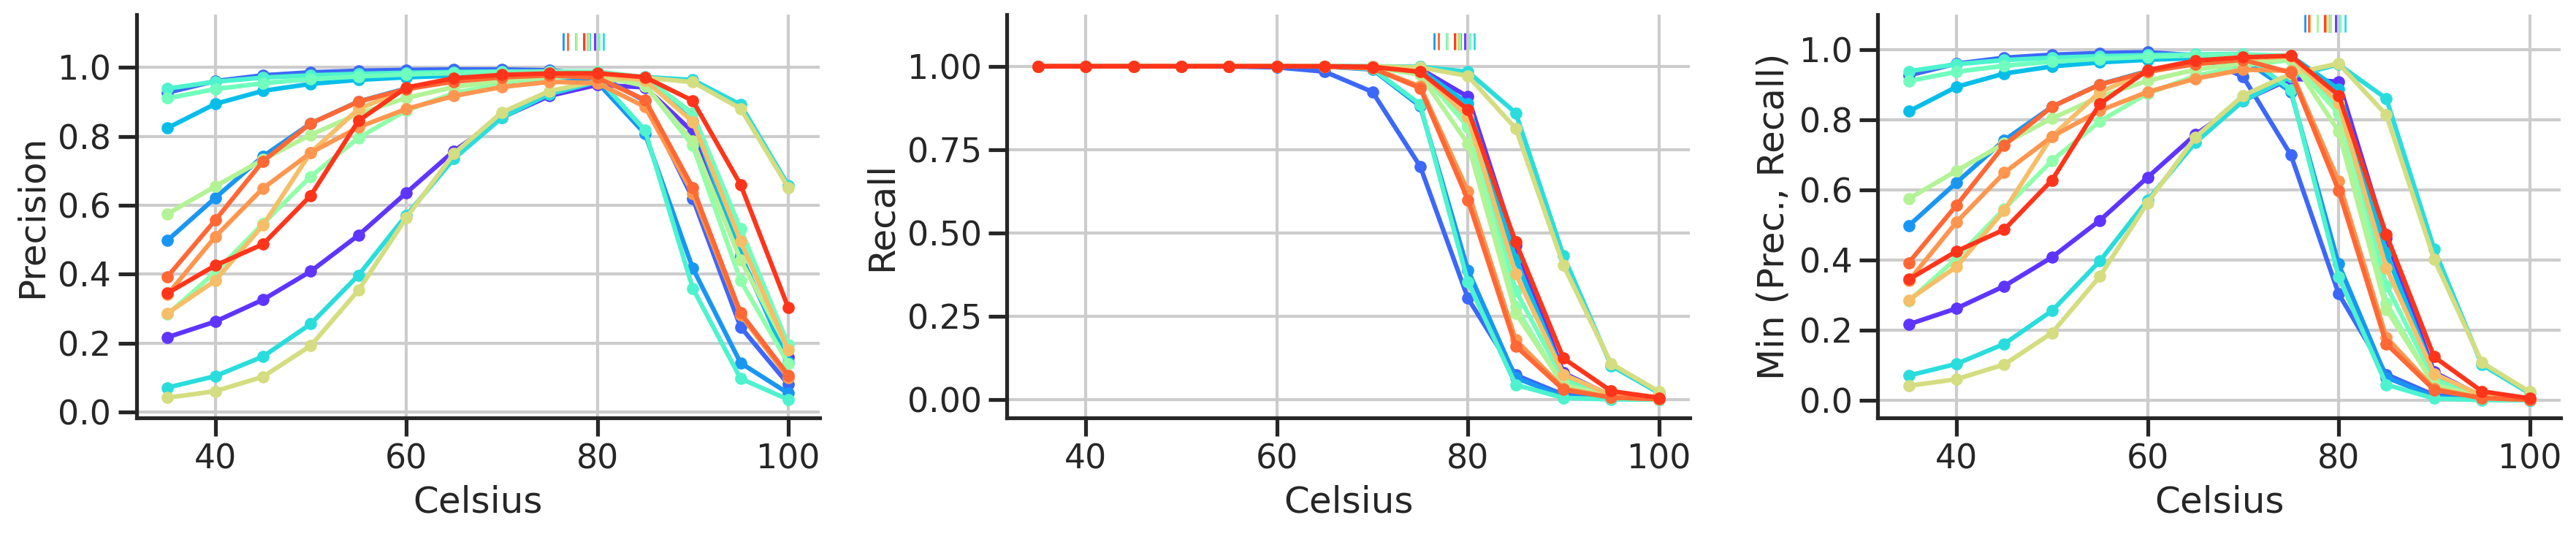

In [14]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*4))
ax_row = axs #[i]
for i in range(ntests):
    color = colors[i]
    j = seqs_token[i]
    tm = tms[j]
    resplot = resall[resall['readout_idx']==j]
    
    nupacku.view_pr(resplot, ax_row, color=color, markersize=5)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tm, 1.05, 1.1, linewidth=1, color=color)
    ax2.vlines(tm, 1.05, 1.1, linewidth=1, color=color)
    ax3.vlines(tm, 1.05, 1.1, linewidth=1, color=color)
    
fig.tight_layout()
plt.show()

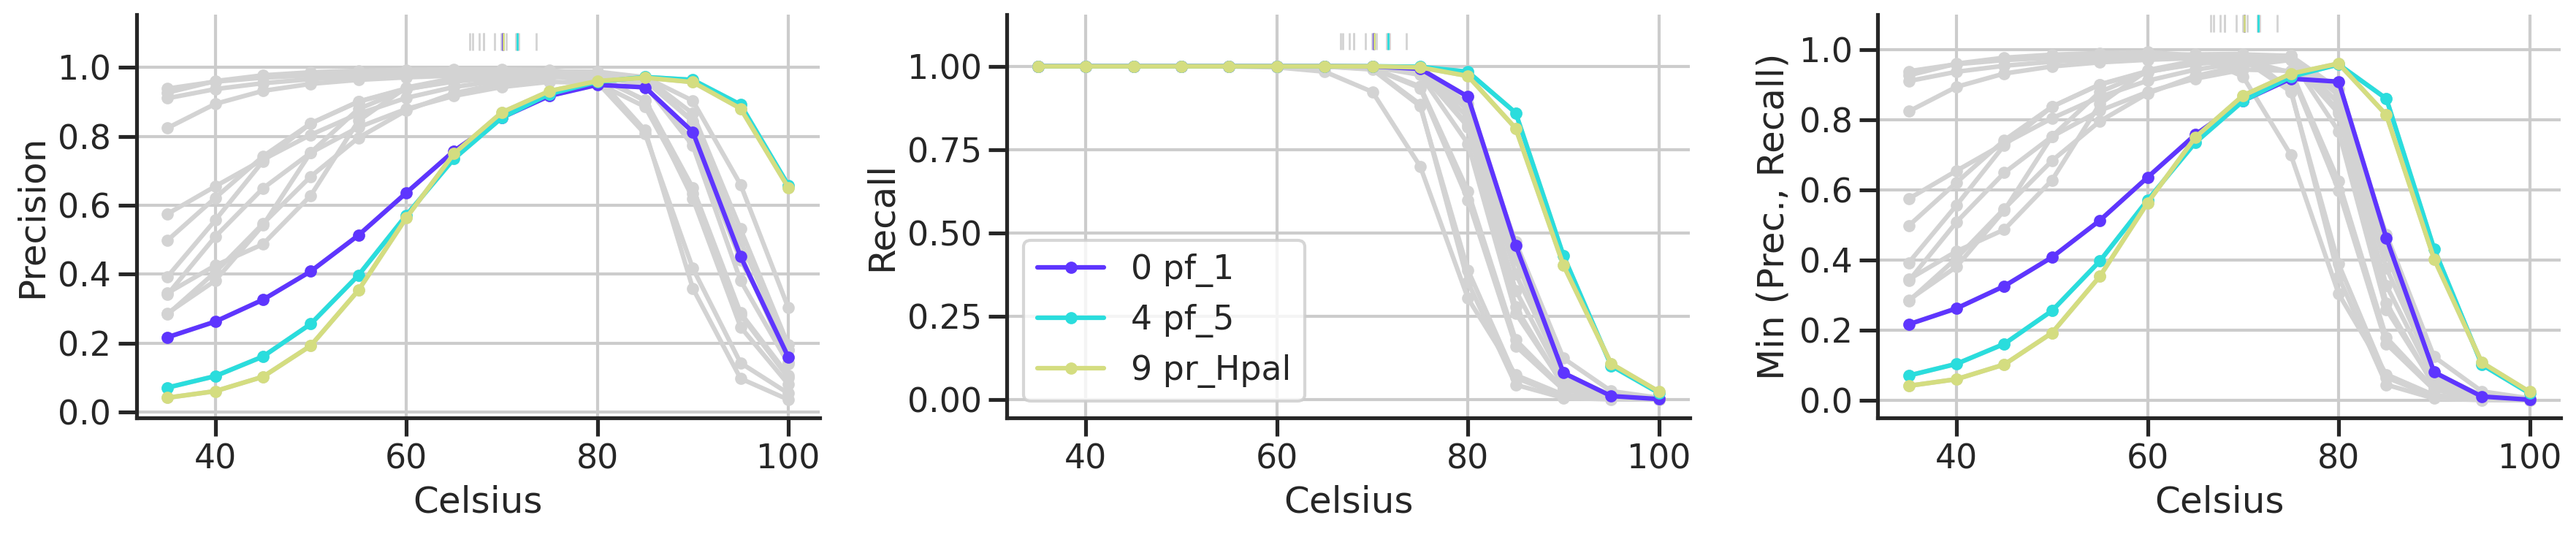

In [15]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*4))
ax_row = axs #[i]
for i in range(ntests):
    color = 'lightgray'
    j = seqs_token[i]
    tm = tms[j]
    resplot = resall[resall['readout_idx']==j]
    
    nupacku.view_pr(resplot, ax_row, color=color, markersize=5)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax2.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax3.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    
for i in [0, 4, 9]: # [1] low recall
    color = colors[i]
    j = seqs_token[i]
    tm = tms[j]
    resplot = resall[resall['readout_idx']==j]
    label = f'{i} {seqs_tag[j]}'#  hybe{seqs_tag[i]}'
    
    nupacku.view_pr(resplot, ax_row, color=color, markersize=5, label=label)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax2.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax3.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    
ax_row[1].legend()
fig.tight_layout()
plt.show()

In [16]:
unqseqs[unqseqs['probename'].isin(['pf_1', 'pf_5', 'pr_Hpal'])]

,set,probename,seq
2,IEGs_n136_Wu_etal_2017_Neuron,pr_Hpal,CGTTAACCTGGCCCGGCTAC
53,dredFISH_PNMF_Nov2022,pf_1,CATGGCATTCTTCGCCGGCT
56,neuroinflammation_GO,pf_5,TGTTCCGCACGCCGTCTCTT


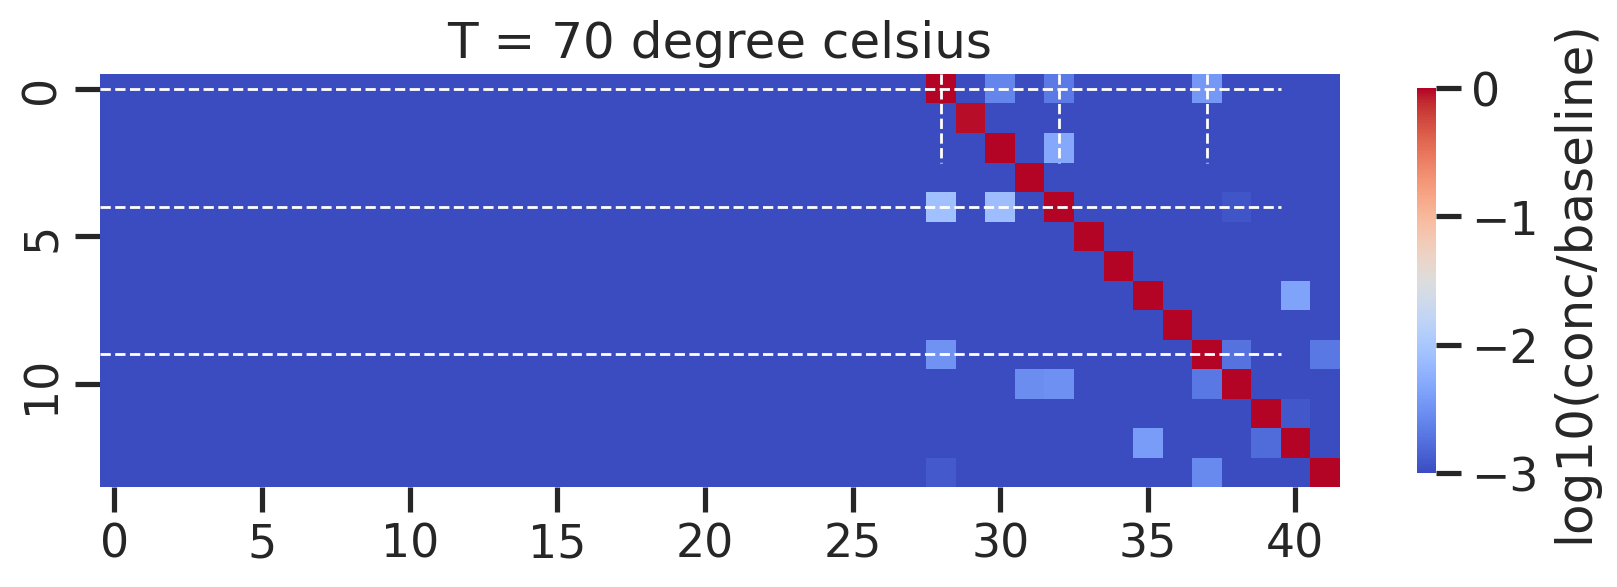

In [17]:
baseconc = conc_e
temp = 70
emap = emaps[temp]
title = f"T = {temp} degree celsius"
fig, ax = plt.subplots(figsize=(10,5))
nupacku.view_emap(emap, baseconc, ax=ax, title=title, vmax=0, vmin=-3)
ax.hlines(0.5+  np.array([0,4,9]), xmin=0, xmax=40, color='white', linewidth=1, linestyle='--')
ax.vlines(0.5+seqs_token[[0,4,9]], ymin=0, ymax=3 , color='white', linewidth=1, linestyle='--')


- 0, 4, 9
- 0: 2, 4, 9
- 4: 0, 2, 
- 9: 0, 10, 13

In [18]:
seqs_enc[seqs_token[[0,2,4,9]]], seqs_tag[seqs_token[[0,2,4,9]]]

(array(['CATGGCATTCTTCGCCGGCT', 'CGCTTTCGAATACGCCGAGT',
        'TGTTCCGCACGCCGTCTCTT', 'CGTTAACCTGGCCCGGCTAC'], dtype=object),
 array(['pf_1', 'pf_3', 'pf_5', 'pr_Hpal'], dtype=object))

# why low recall given similar TMs?
- secondary structure

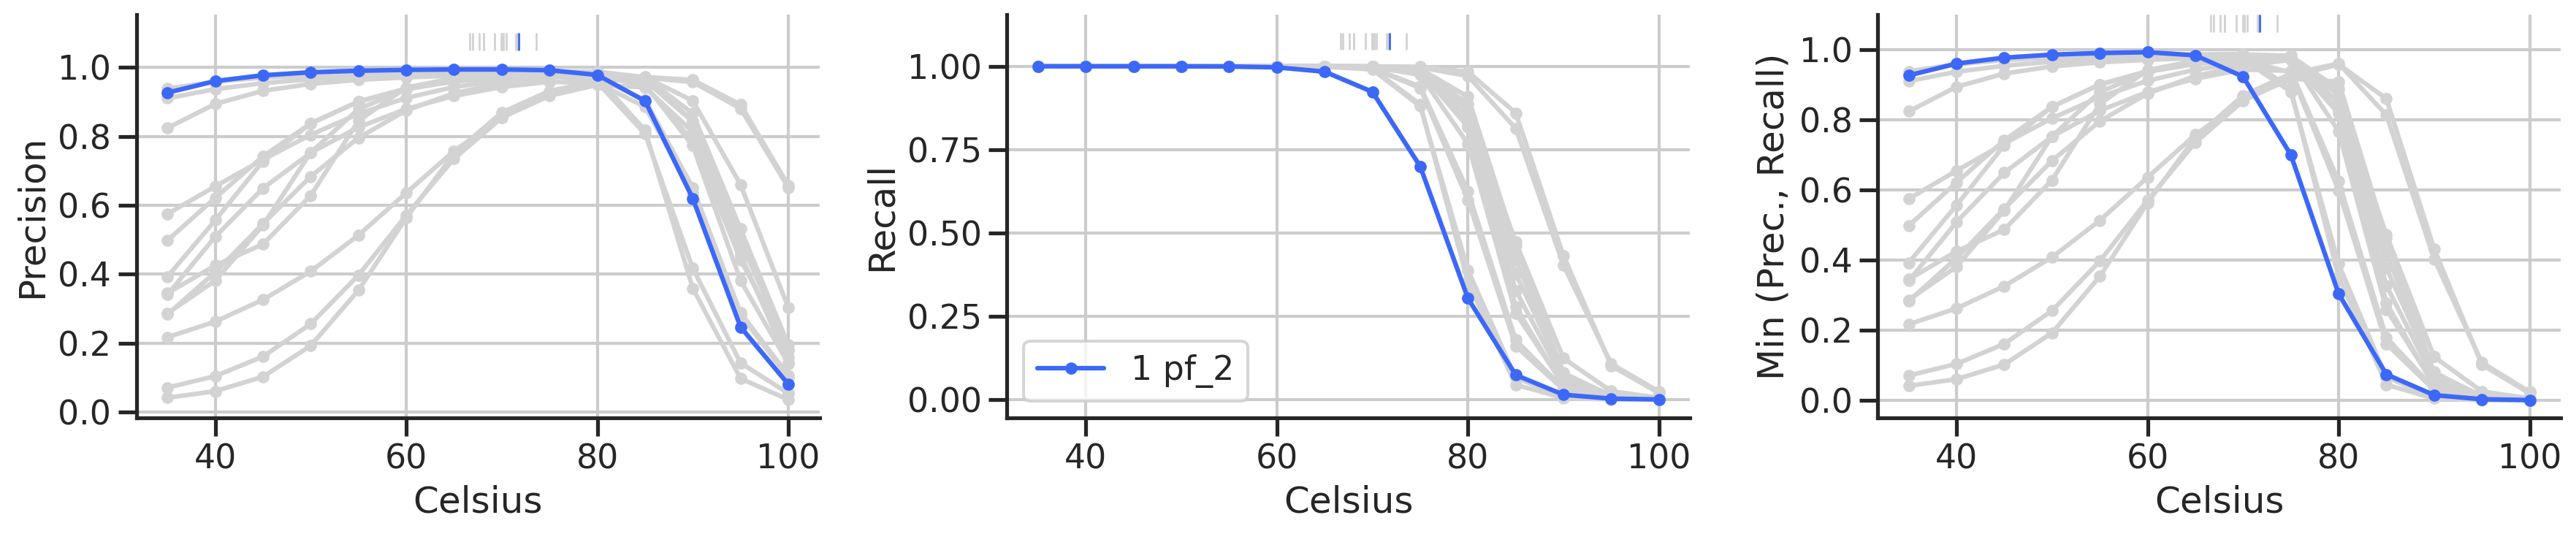

In [19]:
fig, axs = plt.subplots(1,3,figsize=(3*6,1*4))
ax_row = axs #[i]
for i in range(ntests):
    color = 'lightgray'
    j = seqs_token[i]
    tm = tms[j]
    resplot = resall[resall['readout_idx']==j]
    
    nupacku.view_pr(resplot, ax_row, color=color, markersize=5)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax2.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax3.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    
for i in [1]: # [1] low recall
    color = colors[i]
    j = seqs_token[i]
    tm = tms[j]
    resplot = resall[resall['readout_idx']==j]
    label = f'{i} {seqs_tag[j]}'#  hybe{seqs_tag[i]}'
    
    nupacku.view_pr(resplot, ax_row, color=color, markersize=5, label=label)
    ax1, ax2, ax3 = ax_row
    ax1.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax2.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    ax3.vlines(tms[i], 1.05, 1.1, linewidth=1, color=color)
    
ax_row[1].legend()
fig.tight_layout()
plt.show()

In [20]:
unqseqs[unqseqs['probename'].isin(['pf_2'])]

,set,probename,seq
27,dredFISH_DPNMFtree_Nov2022,pf_2,GCGTGTAGGCACGCAAGAGT


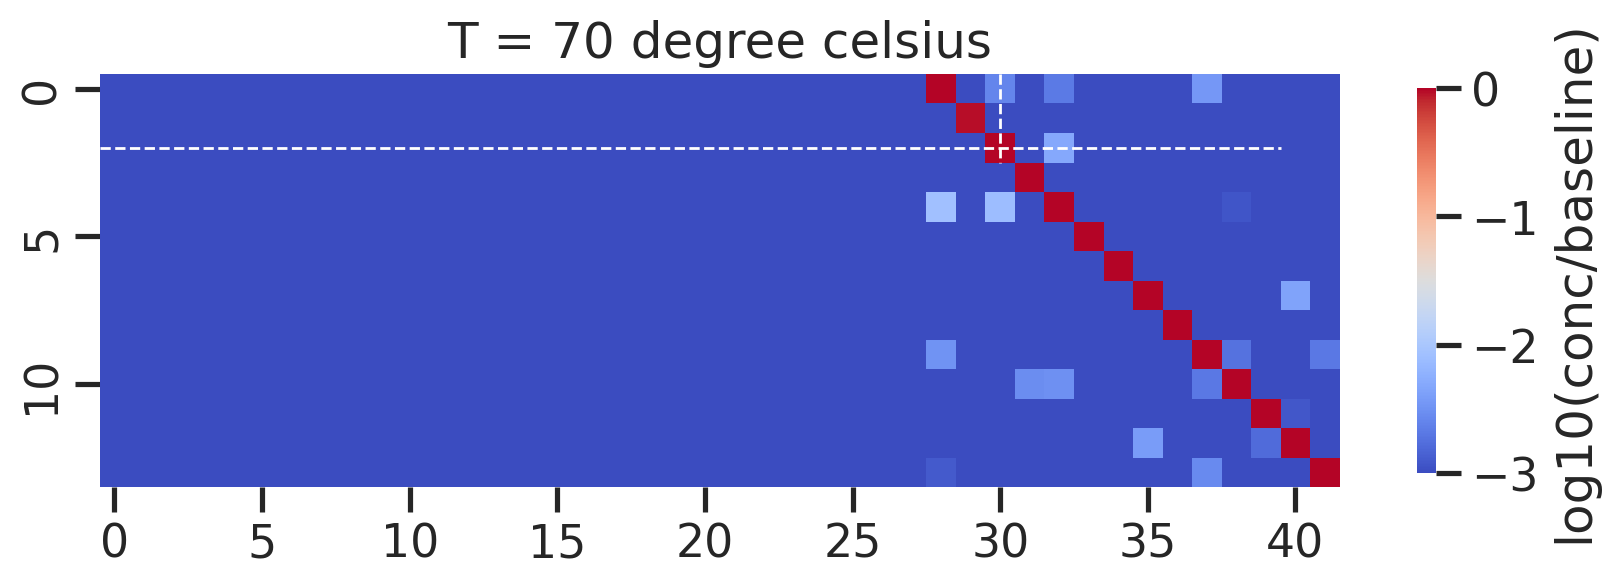

In [22]:
baseconc = conc_e
temp = 70
emap = emaps[temp]
title = f"T = {temp} degree celsius"
fig, ax = plt.subplots(figsize=(10,5))
nupacku.view_emap(emap, baseconc, ax=ax, title=title, vmax=0, vmin=-3)
ax.hlines(0.5+  np.array([2]), xmin=0, xmax=40, color='white', linewidth=1, linestyle='--')
ax.vlines(0.5+seqs_token[[2]], ymin=0, ymax=3 , color='white', linewidth=1, linestyle='--')


In [23]:
unqseqs.groupby(['probename', 'seq']).first().reset_index().sort_values('probename')


,probename,seq,set
0,RS0095,AGAGTGAGTAGTAGTGGAGT,dredFISH_DPNMFtree_Nov2022
1,RS0109,TGTGATGGAAGTTAGAGGGT,dredFISH_DPNMFtree_Nov2022
2,RS0175,TGAAAGGAATGGGTTGTGGT,dredFISH_DPNMFtree_Nov2022
3,RS0237,GGGTTGATTAGTGGTAGAAA,dredFISH_DPNMFtree_Nov2022
4,RS0307,TGTGGAGGGATTGAAGGATA,dredFISH_DPNMFtree_Nov2022
5,RS0332,GGGAGAATGAGGTGTAATGT,dredFISH_DPNMFtree_Nov2022
6,RS0384,TAGAGTTGATAGAGGGAGAA,dredFISH_DPNMFtree_Nov2022
7,RS0406,GATGATGTAGTAGTAAGGGT,dredFISH_DPNMFtree_Nov2022
8,RS0451,GGAGTAGTTGGTTGTTAGGA,dredFISH_DPNMFtree_Nov2022
9,RS0468,AGGAGGAGGGTAATGATAGA,dredFISH_DPNMFtree_Nov2022
